# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [195]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [196]:
sinasc_1 = sinasc_raw[['munResNome','IDADEMAE', 'IDADEPAI']]

#excluindo linha com dado ignorado
sinasc_1.drop(sinasc_1.loc[sinasc_1['munResNome']=='Município ignorado - RO'].index, inplace=True)
sinasc_1.head()


C:\Users\phlea\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [197]:
sinasc_1.groupby('munResNome').agg('mean')

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [198]:
sinasc_2 = sinasc_raw[['ESCMAE','DTNASC', 'SEXO', 'PESO']]
sinasc_2.head()

,ESCMAE,DTNASC,SEXO,PESO
0,8 a 11 anos,2019-02-19,Masculino,3685
1,8 a 11 anos,2019-02-21,Feminino,3055
2,8 a 11 anos,2019-02-25,Feminino,3460
3,12 anos ou mais,2019-03-20,Feminino,2982
4,8 a 11 anos,2019-03-23,Feminino,3310


In [199]:
data = '2019-06-20'
sinasc_2[sinasc_2['DTNASC'] == data].groupby(['ESCMAE', 'SEXO'])['PESO'].mean()

ESCMAE           SEXO     
1 a 3 anos       Feminino     3290.000000
                 Masculino    2975.000000
12 anos ou mais  Feminino     3297.000000
                 Masculino    3180.333333
4 a 7 anos       Feminino     3081.200000
                 Masculino    3380.833333
8 a 11 anos      Feminino     3176.136364
                 Masculino    3465.476190
Name: PESO, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [200]:
# município com menos nascimentos
sinasc_1.munResNome.value_counts().sort_values(ascending = True)[:1]

Castanheiras    32
Name: munResNome, dtype: int64

In [201]:
agrupamento = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras'].groupby('munResNome')
agrupamento.agg([('Média', 'mean'), ('Máxima', 'max'), ('Mínima', 'min')])

IDADEMAE                 IDADEPAI              
                 Média Máxima Mínima      Média Máxima Mínima
munResNome                                                   
Castanheiras  27.28125     39     17  30.392857   43.0   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [202]:
sinasc_3 = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'munResNome', 'ESCMAE', 'IDADEPAI', 'GESTACAO', 'LOCNASC'
]].copy()

In [203]:
sinasc_3.loc[:,'DTNASC'] = pd.to_datetime(sinasc_3['DTNASC'])

In [204]:
sinasc_3.set_index('DTNASC', inplace=True)

In [205]:
sinasc_3['MES'] = sinasc_3.index.month

In [206]:
sinasc_3.head()

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,munResNome,ESCMAE,IDADEPAI,GESTACAO,LOCNASC,MES
DTNASC,,,,,,,,,,,,
2019-02-19,19,Masculino,9.0,10.0,3685,4,Alta Floresta D'Oeste,8 a 11 anos,26.0,37 a 41 semanas,1,2
2019-02-21,29,Feminino,8.0,9.0,3055,4,Alta Floresta D'Oeste,8 a 11 anos,24.0,37 a 41 semanas,1,2
2019-02-25,37,Feminino,8.0,10.0,3460,4,Alta Floresta D'Oeste,8 a 11 anos,32.0,37 a 41 semanas,1,2
2019-03-20,30,Feminino,9.0,10.0,2982,3,Alto Alegre dos Parecis,12 anos ou mais,24.0,37 a 41 semanas,1,3
2019-03-23,30,Feminino,8.0,10.0,3310,4,Alta Floresta D'Oeste,8 a 11 anos,27.0,37 a 41 semanas,1,3


In [207]:
# município onde nasceram mais bebes no mês de Março = 3
mes = 3
sinasc_3[sinasc_3['MES'] == 3].groupby(['munResNome'])['ESCMAE'].count().sort_values(ascending = False)[:1]

munResNome
Porto Velho    733
Name: ESCMAE, dtype: int64

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

### Período de Gestação x Saúde do bebê
Com base nos dados é possível encontrar uma relação clara entre o maior período de gestação dos bebê com seu estado de saúde geral, representado pela maior média de peso ao nascer e os melhores índices de APGAR1 e APGAR5. Os três índices apresentam basicamente a mesma curvatura.

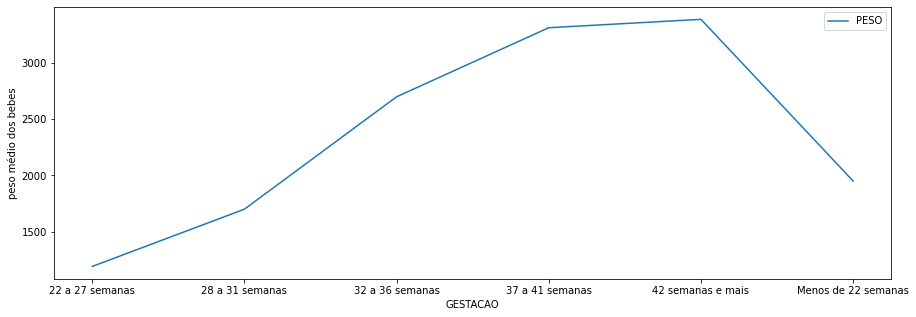

In [208]:
sinasc_3.pivot_table(values = 'PESO',index = 'GESTACAO', aggfunc='mean').plot(figsize=[15,5]);
plt.ylabel('peso médio dos bebes');

In [209]:
apgar5 = sinasc_3.groupby('GESTACAO')['APGAR5'].mean()

In [210]:
apgar1 = sinasc_3.groupby('GESTACAO')['APGAR1'].mean()

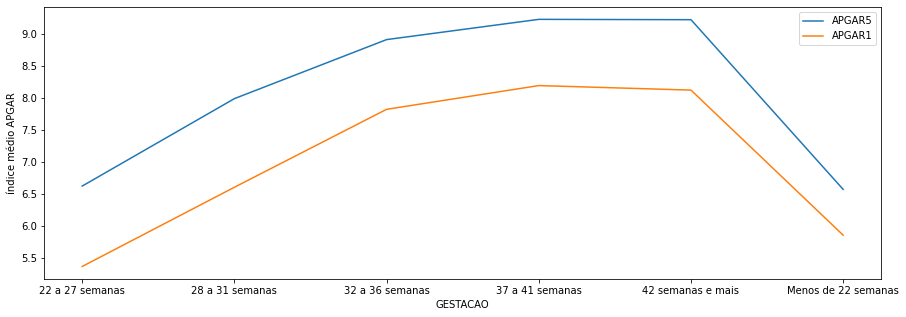

In [211]:
apgar5.plot(figsize=[15,5])
apgar1.plot()
plt.ylabel('índice médio APGAR')
plt.legend();

### Distribuição de nascimentos ao longo do ano
Apesar de não haver nenhuma relação direta de causa, é curioso perceber que o meses de Março a Maio e o mês de Setembro concentram o maior número absoluto de nascimentos no ano.

In [212]:
result = sinasc_3.groupby('MES')['IDADEMAE'].count()

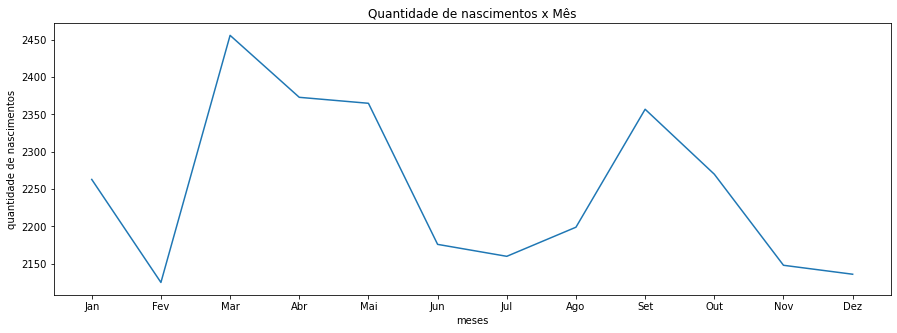

In [213]:
fig, ax = plt.subplots(figsize=[15,5])
result.plot()
ax.set_xticks(result.index)
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.title('Quantidade de nascimentos x Mês')
plt.xlabel('meses')
plt.ylabel('quantidade de nascimentos');

### APPGAR médio x gênero
O APGAR5 médio entre meninas e meninos mostra uma tendência média ligeiramente superior para as meninas ao longo do período amostrado. Mostra que não exite nenhuma relação entre as condições de saúde ao nascer e o gênero.

In [214]:
fem = sinasc_3[sinasc_3['SEXO'] == 'Feminino'].groupby('MES')['APGAR5'].mean()

In [215]:
masc = sinasc_3[sinasc_3['SEXO'] == 'Masculino'].groupby('MES')['APGAR5'].mean()

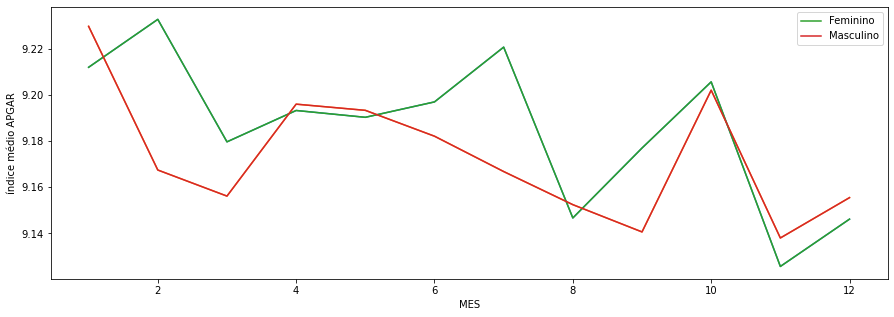

In [216]:
fem.plot(figsize=[15,5])
masc.plot()
line1, = plt.plot(fem, label='Feminino')
line2, = plt.plot(masc, label='Masculino')
plt.ylabel('índice médio APGAR')
plt.legend([line1, line2], ['Feminino', 'Masculino']);

In [217]:
idade_apgar = sinasc_3.groupby('IDADEMAE')['APGAR5'].mean()

<AxesSubplot:xlabel='IDADEMAE'>

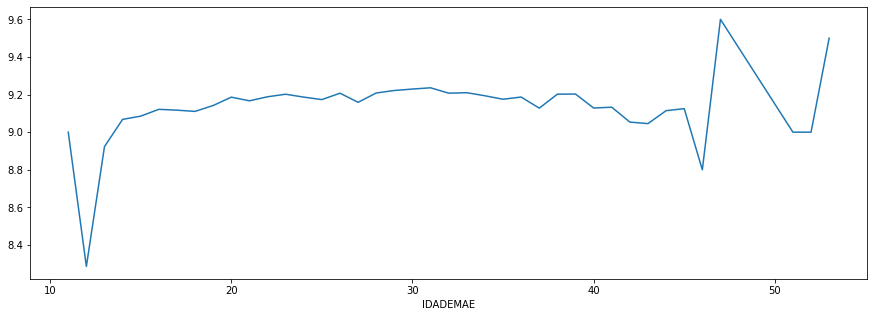

In [218]:
idade_apgar.plot(figsize=[15,5])


### Relação IDADEMAE x APGAR5
Os dados mostram curiosamente um pico no APGAR5 médio entre as mães mais maduras entre 45 e 50 anos, quando geralmente a gravidez merece maior atenção. Na outra ponta, entre as mães muito jovens, abaixo dos 15 anos, o APGAR5 tem uma queda importante.

**Outras relações entre as variáveis ESCMAE, IDADEMAE, IDADEPAI, APGAR e PESO já foram descritas na aula, daí não quis repetir no exercício.**